<a href="https://colab.research.google.com/github/juii18/Project--Regression_ML_Model/blob/main/Regression_Life_Expectency_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPROCESSING

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Life_Expectancy_Data_v2.csv')

In [5]:
df.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.tail()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,67,69,62,85,27,4.36,0.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,62,75,96,61,26,4.06,0.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,50,74,55,95,25,4.43,0.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,66,66,74,78,25,1.72,0.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,55,76,76,98,24,1.68,0.0,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


Step 3-Sanity check of data

In [7]:
df.shape

(2938, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             

In [9]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy (men),0
Life expectancy(women),0
Adult Mortality (men),0
Adult Mortality (women),0
Infant deaths,0
Alcohol,194
Percentage expenditure,0


Finding the percentage of missing values

In [10]:
df.isnull().sum()/df.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy (men),0.000000
Life expectancy(women),0.000000
Adult Mortality (men),0.000000
Adult Mortality (women),0.000000
Infant deaths,0.000000
Alcohol,6.603131
Percentage expenditure,0.000000


In [11]:
#Finding Duplicates
df.duplicated().sum()

np.int64(0)

Step 4-Exploratory data analysis(Knowning the dataset)


In [12]:
df.describe()

,Year,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,Hepatitis B(men),Hepatitis B(women),...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2744.000000,2938.000000,2938.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,67.710007,67.629340,74.732811,74.558203,30.303948,4.602861,738.251295,46.011572,46.469707,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,10.346219,10.325241,14.728866,14.682064,117.926501,4.052413,1987.914858,16.558741,16.891266,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,50.000000,50.000000,50.000000,50.000000,0.000000,0.010000,0.000000,18.000000,18.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,59.000000,59.000000,62.000000,62.000000,0.000000,0.877500,4.685343,31.000000,32.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,68.000000,67.500000,74.500000,74.000000,3.000000,3.755000,64.912906,46.000000,46.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,77.000000,76.000000,87.000000,87.000000,22.000000,7.702500,441.534144,60.000000,61.000000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,85.000000,85.000000,100.000000,100.000000,1800.000000,17.870000,19479.911610,75.000000,75.000000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Ploting the Histogram to understand distribution of data


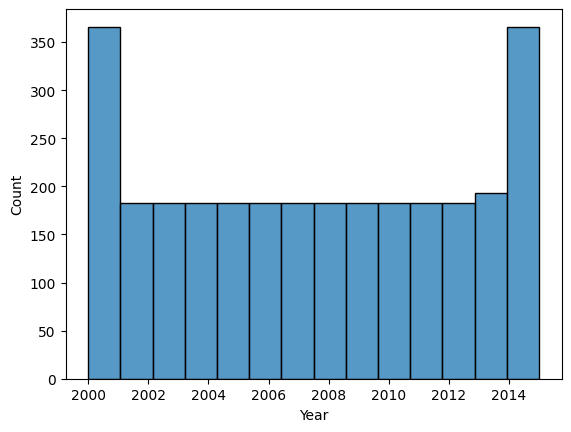

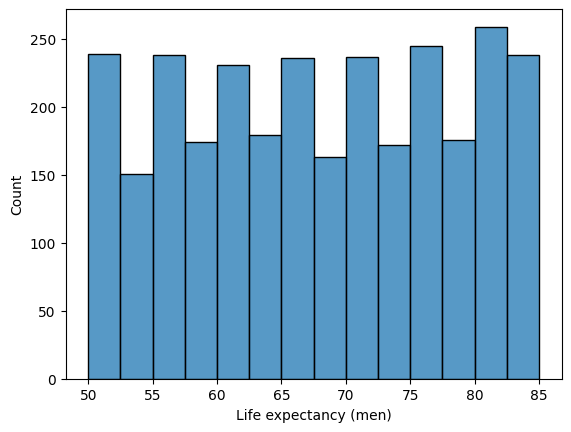

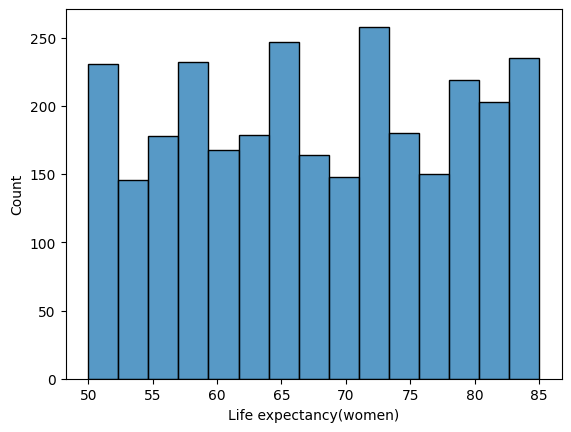

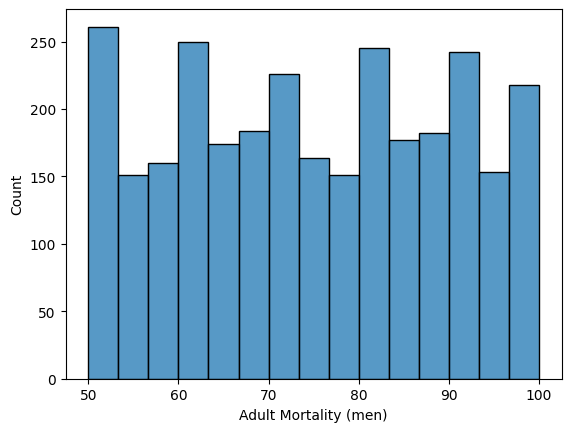

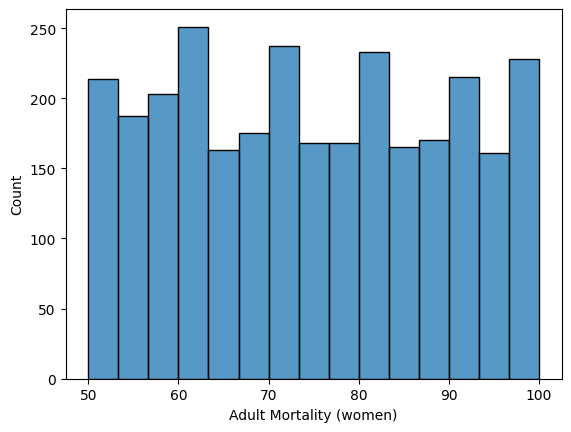

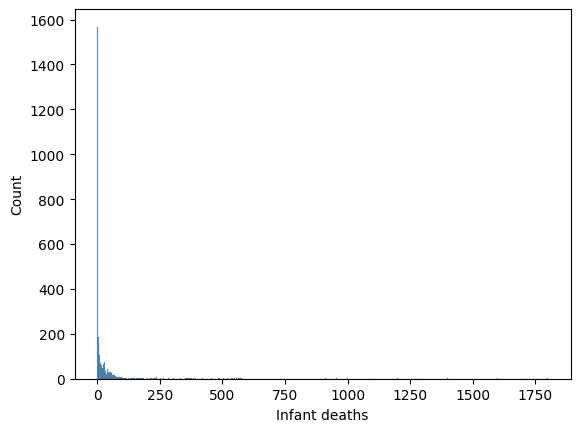

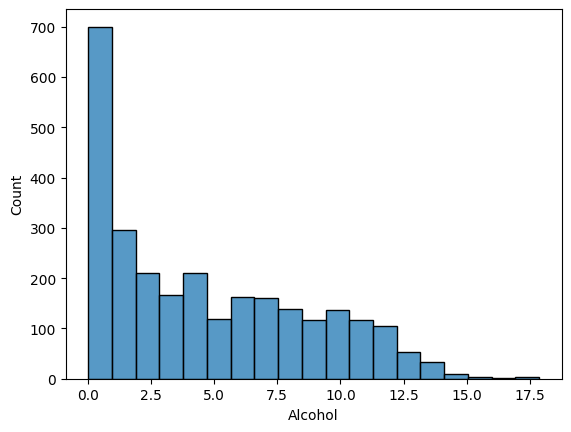

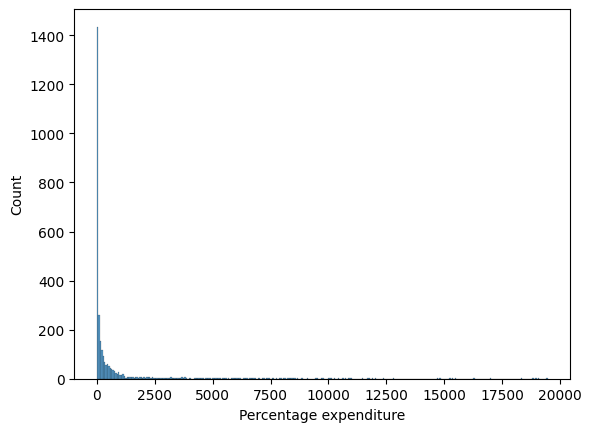

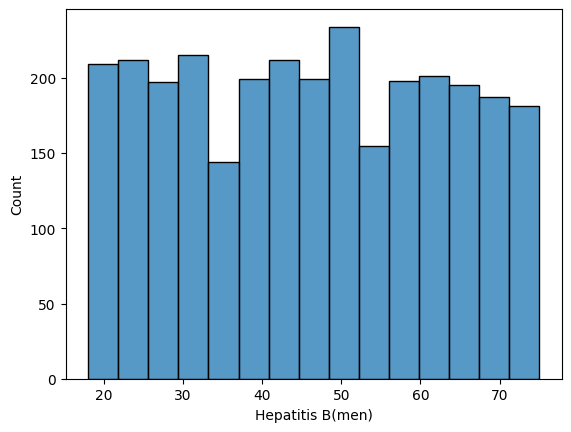

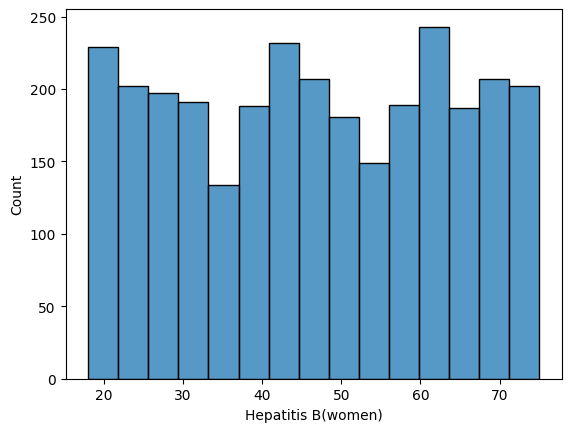

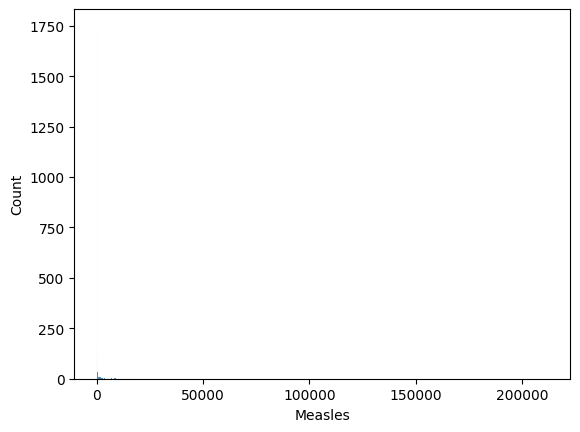

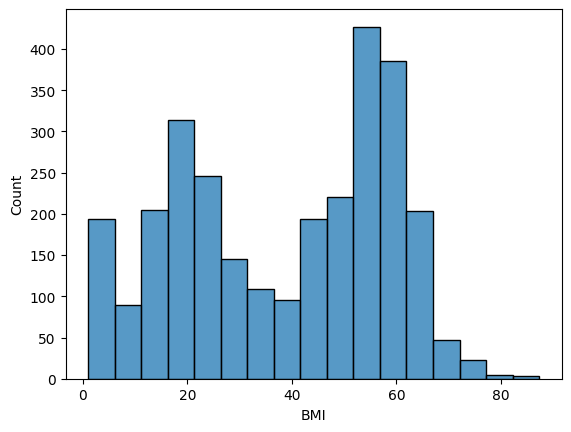

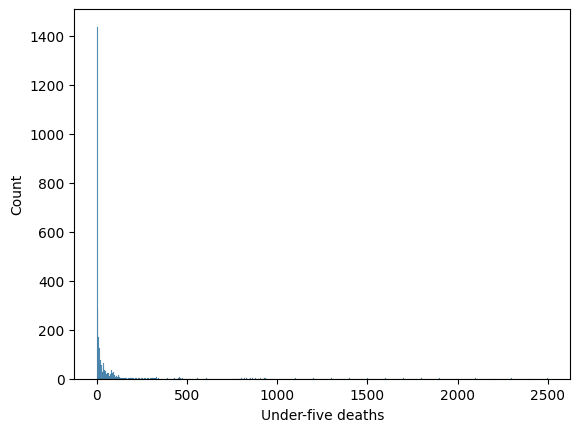

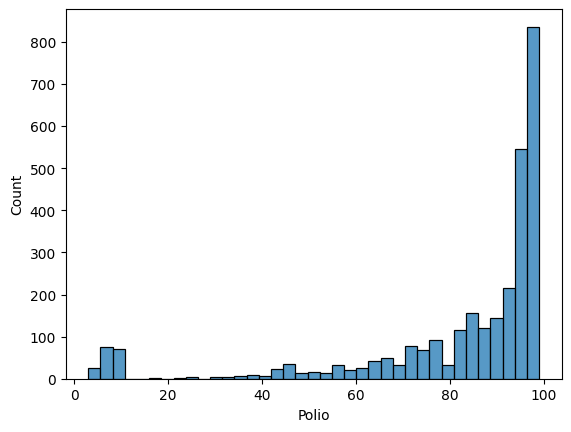

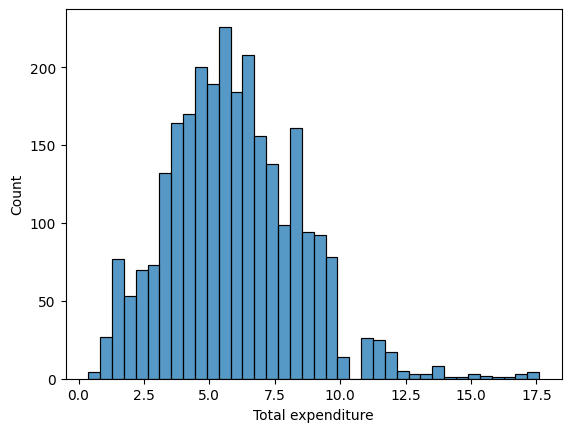

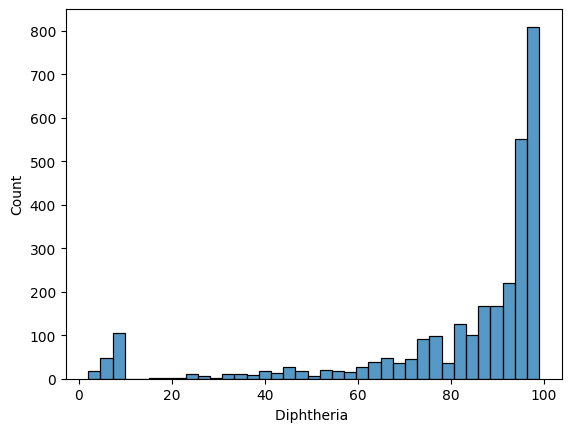

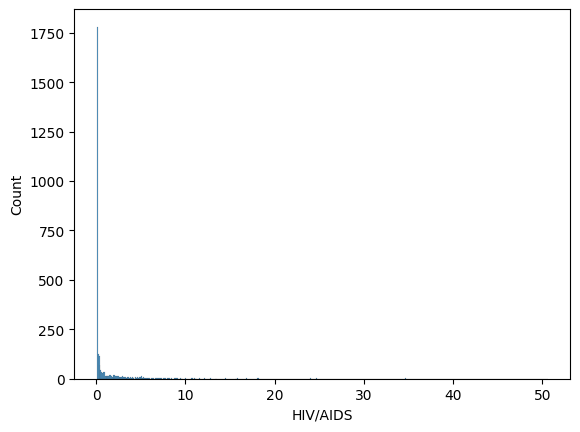

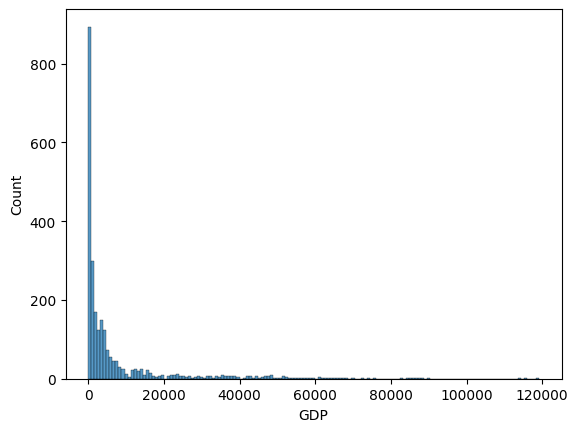

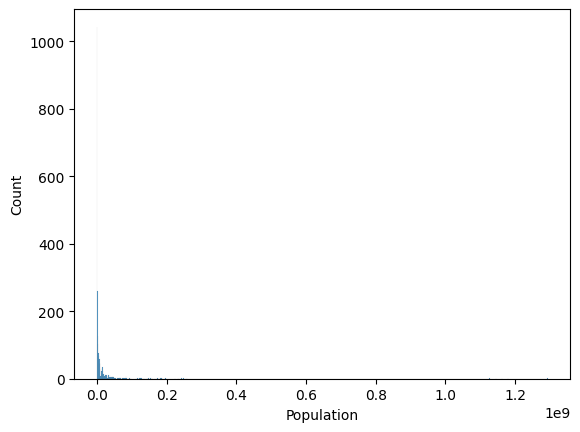

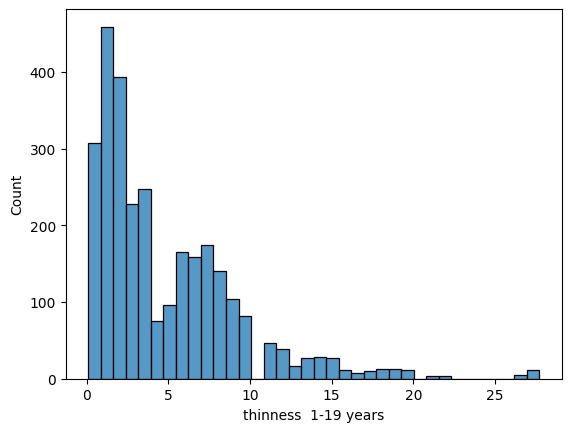

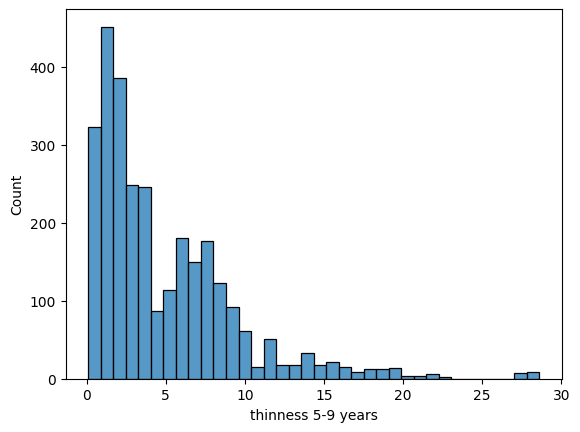

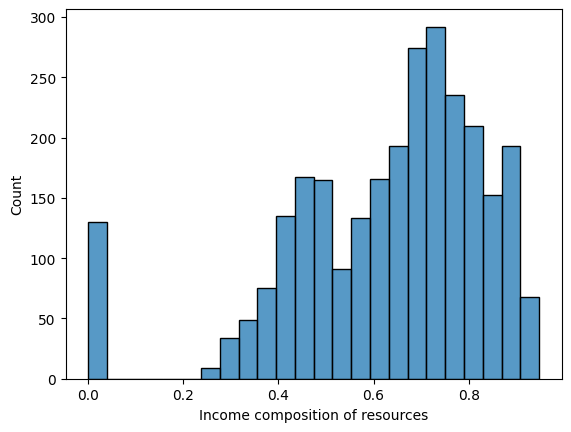

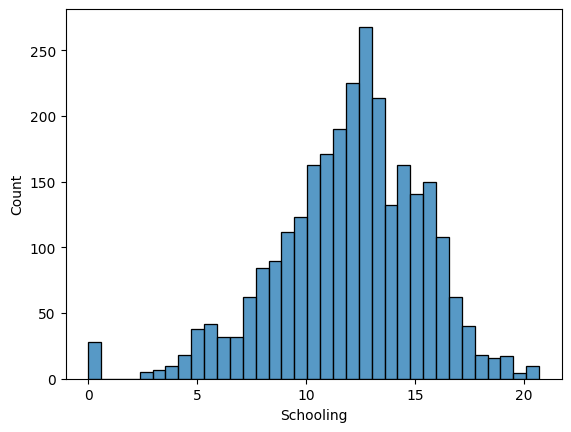

In [13]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(df[i])
  plt.show()

Ploting Boxplot to identify Outliers

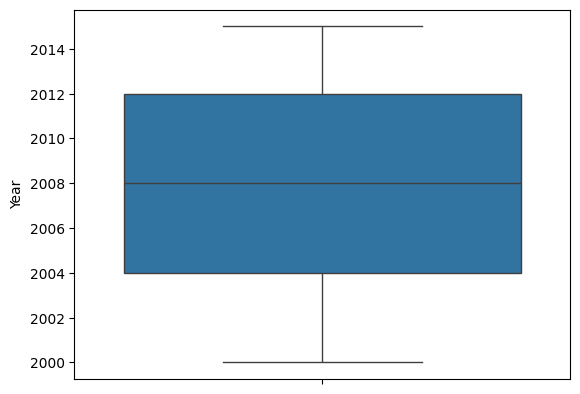

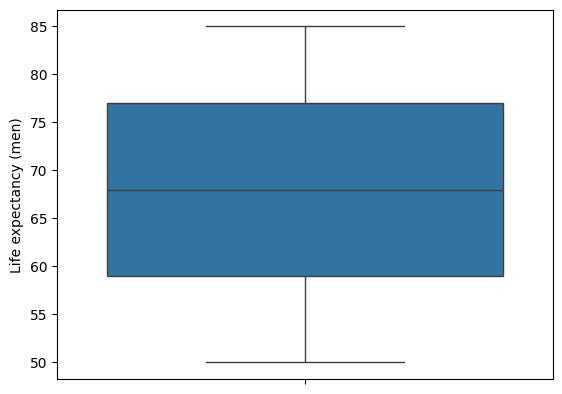

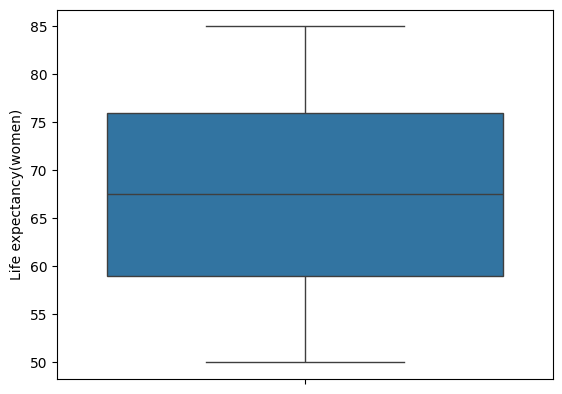

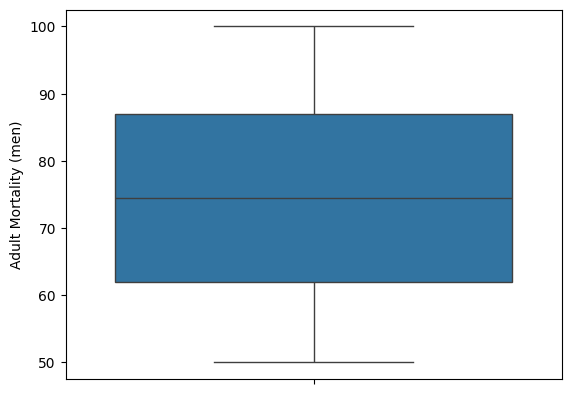

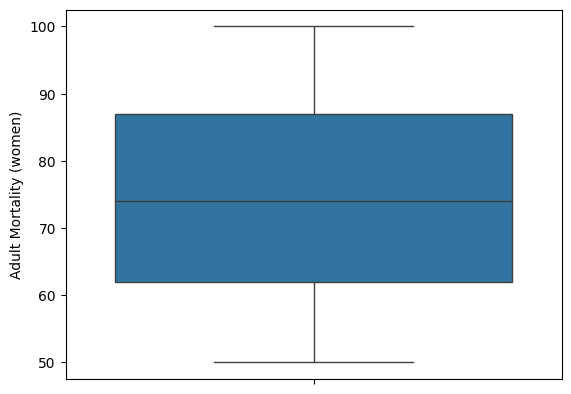

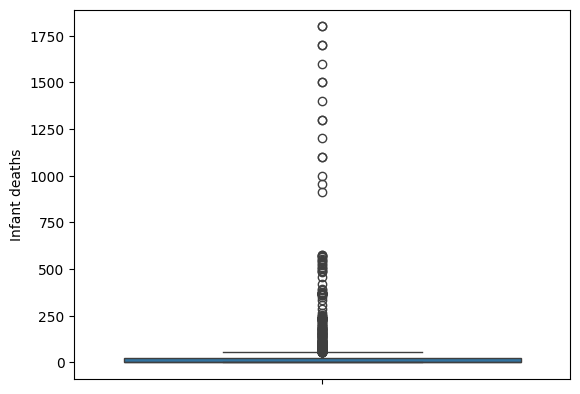

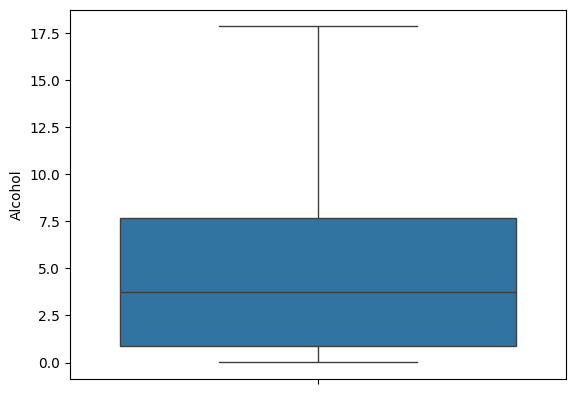

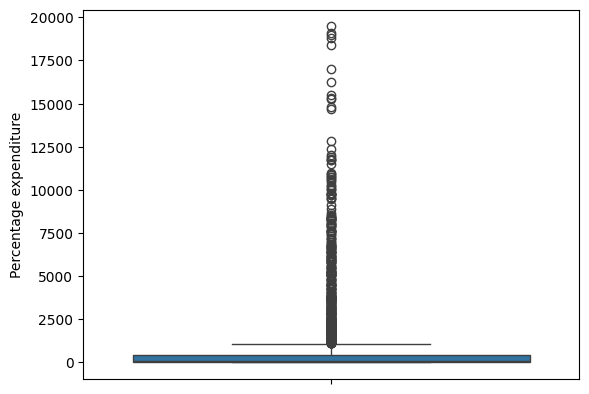

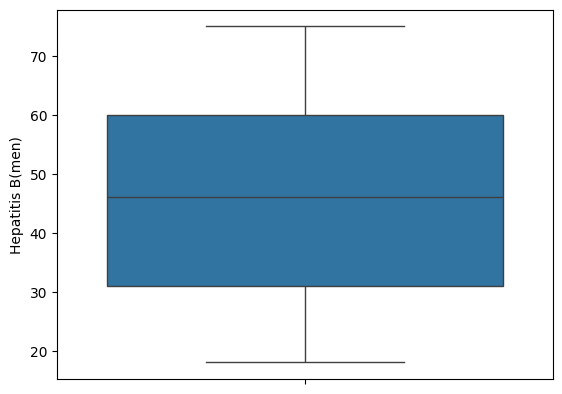

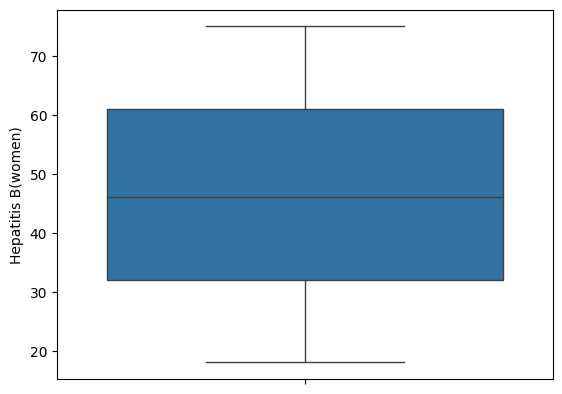

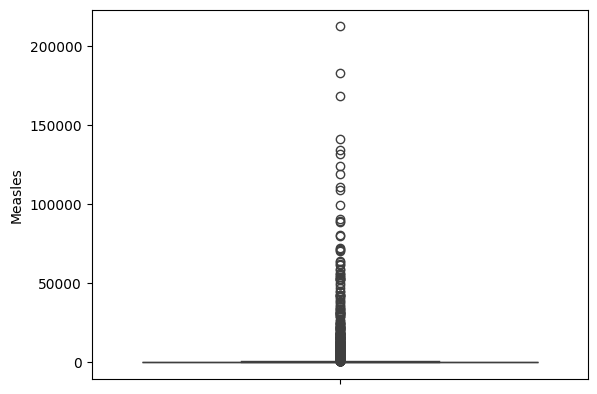

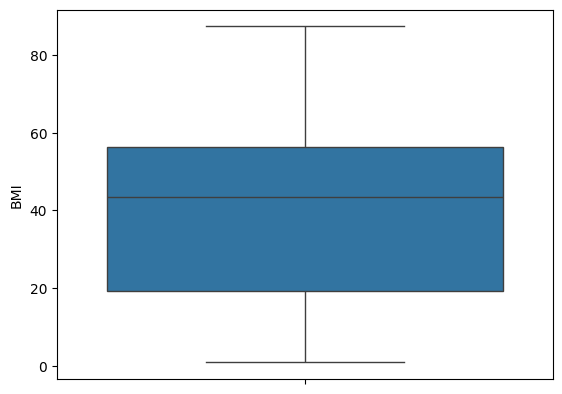

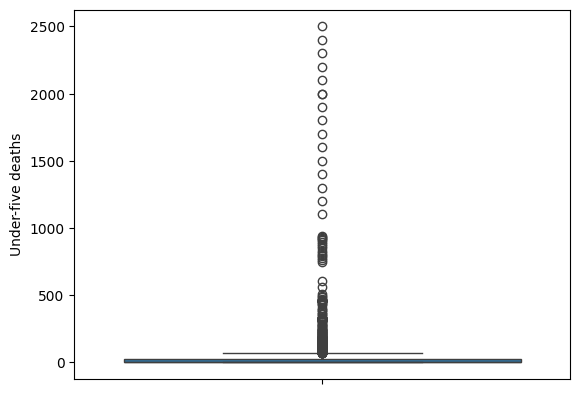

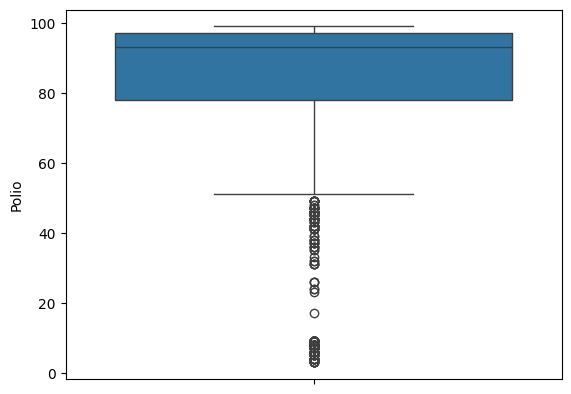

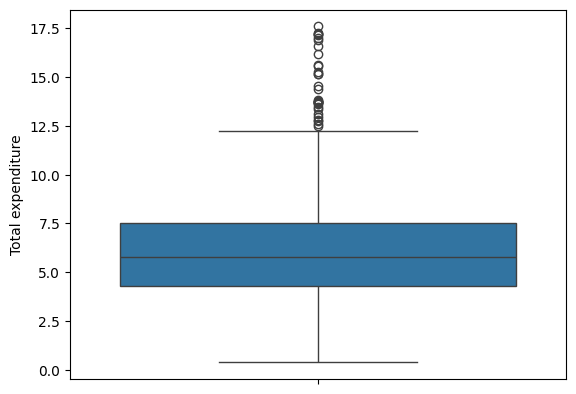

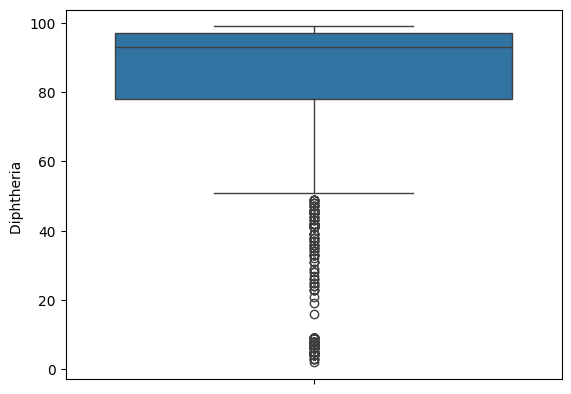

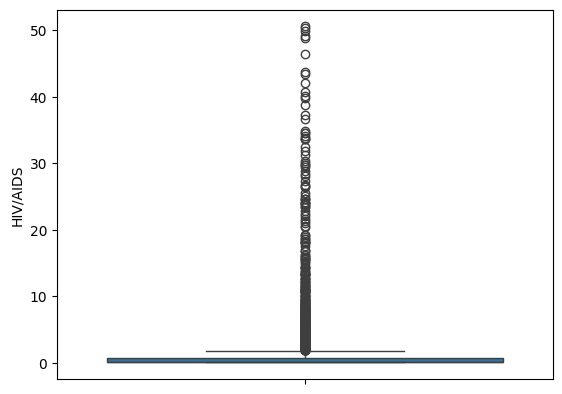

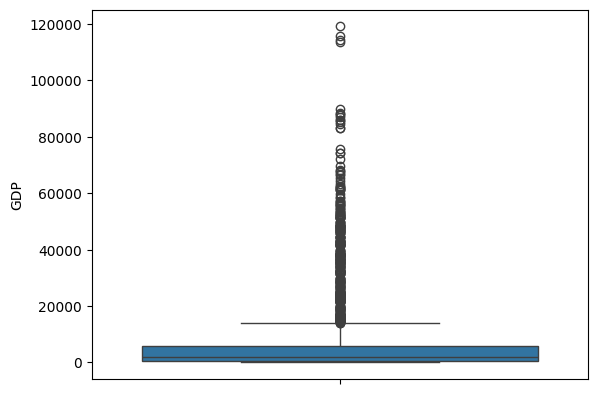

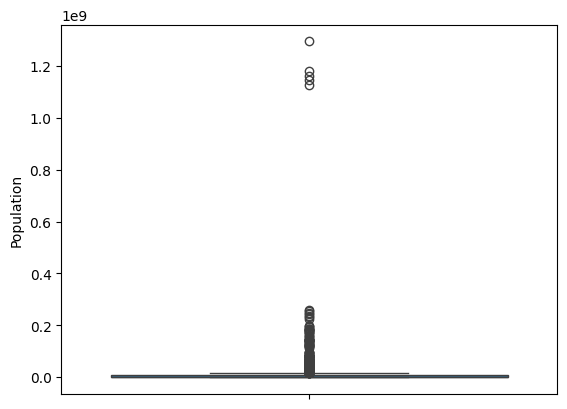

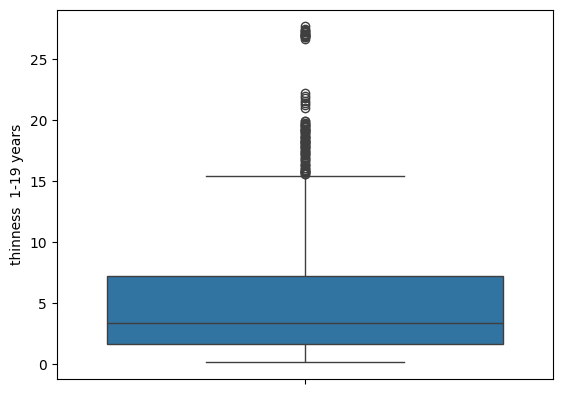

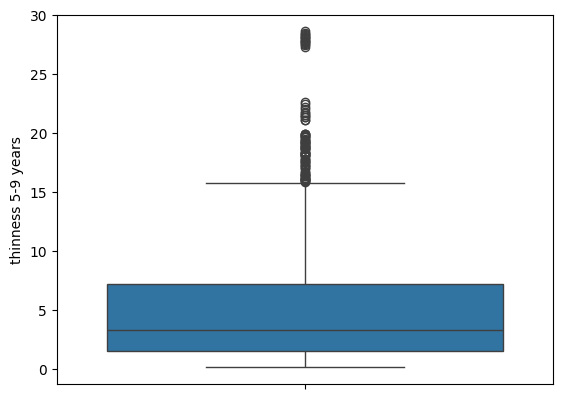

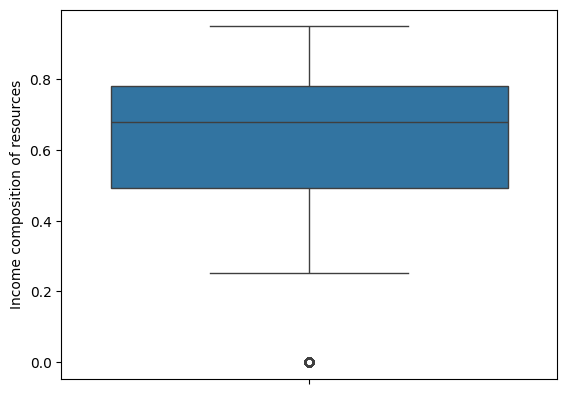

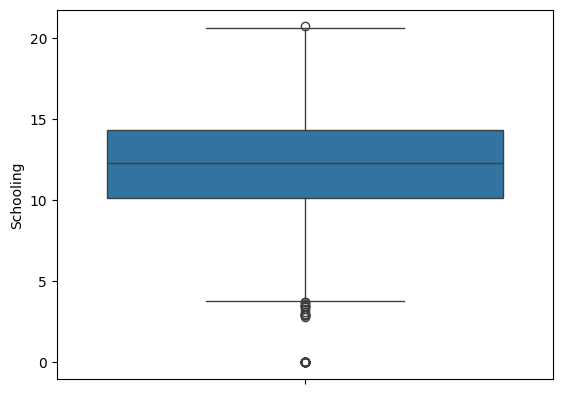

In [14]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(df[i])
  plt.show()

Step 5-Handling Missing Values

In [15]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [16]:
for i in df.select_dtypes(include="number").columns:
 df[i]=impute.fit_transform(df[[i]])

In [17]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy (men),0
Life expectancy(women),0
Adult Mortality (men),0
Adult Mortality (women),0
Infant deaths,0
Alcohol,0
Percentage expenditure,0
